# Чернявский Андрей М24-514
# Анализ данных и машинное обучение (часть 2)
# Лабораторная работа 1

In [ ]:
# импорты

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# определение параметров

BASE_URL = "https://api.hh.ru/vacancies"
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

PARAMS = {
    "text": "Разработчик",
    "only_with_salary": True,
    "per_page": 100,
    "page": 0
}
TOTAL_VACANCIES_TO_FETCH = 2000

In [ ]:
# парсинг вакансий с сайта

all_vacancies = []
current_page = 0
found_vacancies_count = 0

print(f"Starting to fetch up to {TOTAL_VACANCIES_TO_FETCH} vacancies with corrected User-Agent...")

while found_vacancies_count < TOTAL_VACANCIES_TO_FETCH:
    PARAMS["page"] = current_page

    try:
        response = requests.get(BASE_URL, headers=HEADERS, params=PARAMS)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        response_data = response.json()

        items = response_data.get("items")

        if not items:
            print(f"No more vacancies found on page {current_page}. Breaking loop.")
            break

        all_vacancies.extend(items)
        found_vacancies_count += len(items)
        current_page += 1

        # Optional: print progress
        print(f"Fetched {len(items)} vacancies from page {current_page-1}. Total collected: {found_vacancies_count}")

        # API has a limit on pages, or TOTAL_VACANCIES_TO_FETCH might be less than total available
        # Also check if we've reached the 'pages' limit reported by the API if available
        if current_page >= response_data.get('pages', current_page + 1):
            print(f"Reached the last page according to API response. Breaking loop.")
            break

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err} on page {current_page}")
        # Print the response content for more details on the 400 error
        if response.status_code == 400:
            print(f"Response content: {response.text}")
        break
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err} on page {current_page}")
        break
    except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err} on page {current_page}")
        break
    except requests.exceptions.RequestException as req_err:
        print(f"An unexpected error occurred: {req_err} on page {current_page}")
        break

print(f"Successfully collected {len(all_vacancies)} vacancies.")

Starting to fetch up to 2000 vacancies with corrected User-Agent...
Fetched 100 vacancies from page 0. Total collected: 100
Fetched 100 vacancies from page 1. Total collected: 200
Fetched 100 vacancies from page 2. Total collected: 300
Fetched 100 vacancies from page 3. Total collected: 400
Fetched 100 vacancies from page 4. Total collected: 500
Fetched 100 vacancies from page 5. Total collected: 600
Fetched 100 vacancies from page 6. Total collected: 700
Fetched 100 vacancies from page 7. Total collected: 800
Fetched 100 vacancies from page 8. Total collected: 900
Fetched 100 vacancies from page 9. Total collected: 1000
Fetched 100 vacancies from page 10. Total collected: 1100
Fetched 100 vacancies from page 11. Total collected: 1200
Fetched 100 vacancies from page 12. Total collected: 1300
Fetched 100 vacancies from page 13. Total collected: 1400
Fetched 100 vacancies from page 14. Total collected: 1500
Fetched 100 vacancies from page 15. Total collected: 1600
Fetched 100 vacancies f

In [ ]:
# перемещение информации о вакансиях в словарь

processed_vacancies = []

for vacancy in all_vacancies:
    area_data = vacancy.get('area') or {}
    salary_data = vacancy.get('salary') or {}
    snippet_data = vacancy.get('snippet') or {}
    experience_data = vacancy.get('experience') or {}
    vacancy_data = {
        'id': vacancy.get('id'),
        'name': vacancy.get('name'),
        'area.name': area_data.get('name'),
        'salary.from': salary_data.get('from'),
        'salary.to': salary_data.get('to'),
        'salary.gross': salary_data.get('gross'),
        'salary.currency': salary_data.get('currency'),
        'snippet.requirements': snippet_data.get('requirements'),
        'experience.name': experience_data.get('name')
    }
    processed_vacancies.append(vacancy_data)

print(f"Extracted and flattened data for {len(processed_vacancies)} vacancies.")
if processed_vacancies:
    print("First 3 processed vacancies:")
    for i, item in enumerate(processed_vacancies[:3]):
        print(f"Vacancy {i+1}: {item}")
else:
    print("No vacancies were processed.")

Extracted and flattened data for 2000 vacancies.
First 3 processed vacancies:
Vacancy 1: {'id': '127331335', 'name': 'Разработчик', 'area.name': 'Пятигорск', 'salary.from': 50000, 'salary.to': 60000, 'salary.gross': False, 'salary.currency': 'RUR', 'snippet.requirements': None, 'experience.name': 'Нет опыта'}
Vacancy 2: {'id': '127971154', 'name': 'Разработчик', 'area.name': 'Санкт-Петербург', 'salary.from': 20000, 'salary.to': 40000, 'salary.gross': True, 'salary.currency': 'RUR', 'snippet.requirements': None, 'experience.name': 'Нет опыта'}
Vacancy 3: {'id': '127795104', 'name': 'Программист', 'area.name': 'Калининград', 'salary.from': 100000, 'salary.to': 120000, 'salary.gross': False, 'salary.currency': 'RUR', 'snippet.requirements': None, 'experience.name': 'От 1 года до 3 лет'}


In [ ]:
# создание датафрейма с вакансиями на основе словаря

df = pd.DataFrame(processed_vacancies)
df.tail(5)

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirements,experience.name
1995,127919879,Android-разработчик,Воронеж,100000.0,NaN,False,RUR,None,От 1 года до 3 лет
1996,127917684,Java-разработчик,Екатеринбург,200000.0,250000.0,False,RUR,None,От 1 года до 3 лет
1997,127978212,Инженер - программист (тестировщик),Уфа,45000.0,NaN,False,RUR,None,От 1 года до 3 лет
1998,127977443,Программист 1С,Степногорск,196000.0,340000.0,True,KZT,None,От 1 года до 3 лет
1999,128079869,Backend C# ASP.NET developer (Senior),Москва,350000.0,500000.0,True,RUR,None,Более 6 лет


In [ ]:
# создание новой колонки датафрейма

df['clean_sal'] = df[['salary.from', 'salary.to']].mean(axis=1)
df

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirements,experience.name,clean_sal
0,127331335,Разработчик,Пятигорск,50000.0,60000.0,False,RUR,None,Нет опыта,55000.0
1,127971154,Разработчик,Санкт-Петербург,20000.0,40000.0,True,RUR,None,Нет опыта,30000.0
2,127795104,Программист,Калининград,100000.0,120000.0,False,RUR,None,От 1 года до 3 лет,110000.0
3,127729458,Python-разработчик,Москва,NaN,240000.0,False,RUR,None,От 3 до 6 лет,240000.0
4,127928778,Разработчик fullstack,Санкт-Петербург,60000.0,100000.0,True,RUR,None,От 1 года до 3 лет,80000.0
...,...,...,...,...,...,...,...,...,...,...
1995,127919879,Android-разработчик,Воронеж,100000.0,NaN,False,RUR,None,От 1 года до 3 лет,100000.0
1996,127917684,Java-разработчик,Екатеринбург,200000.0,250000.0,False,RUR,None,От 1 года до 3 лет,225000.0
1997,127978212,Инженер - программист (тестировщик),Уфа,45000.0,NaN,False,RUR,None,От 1 года до 3 лет,45000.0
1998,127977443,Программист 1С,Степногорск,196000.0,340000.0,True,KZT,None,От 1 года до 3 лет,268000.0


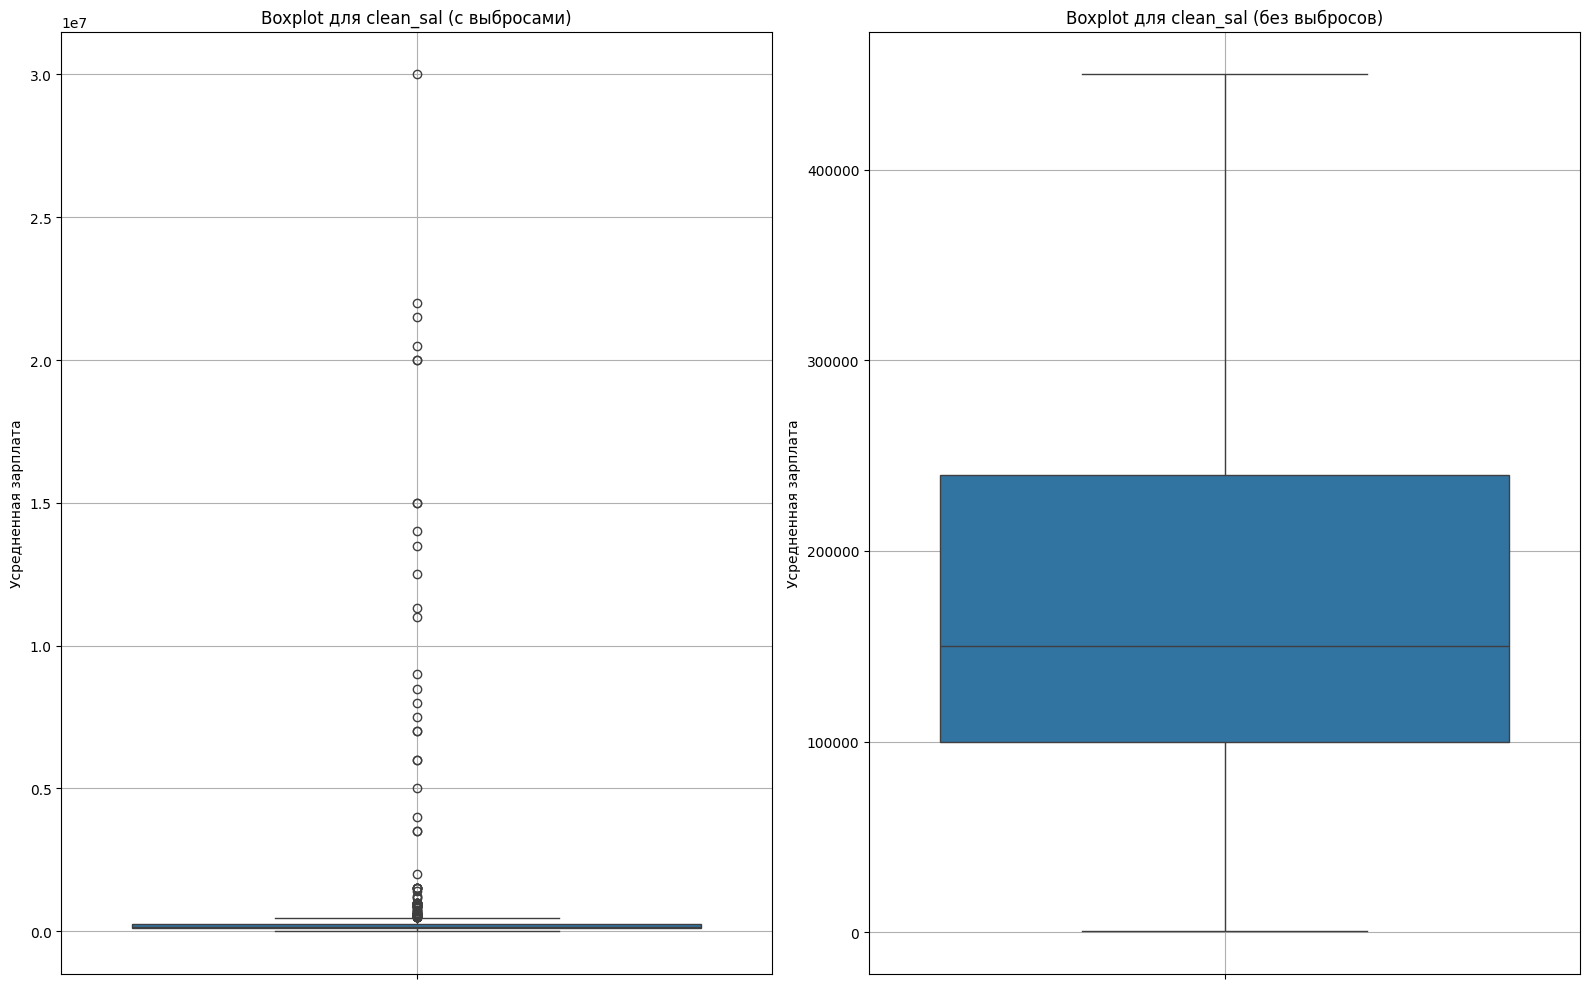

In [ ]:
# построение двух графиков boxplot
# по первому (левому) графику можно сделать вывод, что в столбце clean_sal есть некоторое количество аномальных значений (выбросов)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(y=df['clean_sal'], showfliers=True, ax=axes[0])
axes[0].set_title('Boxplot для clean_sal (с выбросами)')
axes[0].set_ylabel('Усредненная зарплата')
axes[0].grid(True)

sns.boxplot(y=df['clean_sal'], showfliers=False, ax=axes[1])
axes[1].set_title('Boxplot для clean_sal (без выбросов)')
axes[1].set_ylabel('Усредненная зарплата')
axes[1].grid(True)

plt.tight_layout()
plt.show()